**1. Read the dataset to the python environment**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/train_loan (1).csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data.shape

(614, 13)

**2. Perform different preprocessing steps**

**a.Missing value handling**

In [9]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.drop('Loan_ID',axis=1,inplace=True)

In [11]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [12]:
data['Gender'].mode(0)

0    Male
Name: Gender, dtype: object

In [13]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [14]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
data['Married'].mode(0)

0    Yes
Name: Married, dtype: object

In [16]:
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

In [17]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [18]:
data['Dependents'].mode(0)

0    0
Name: Dependents, dtype: object

In [19]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [20]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [21]:
data['Self_Employed'].mode(0)

0    No
Name: Self_Employed, dtype: object

In [22]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [23]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [24]:
data['Loan_Amount_Term'].mode(0)

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [25]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [26]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [27]:
data['Credit_History'].mode(0)

0    1.0
Name: Credit_History, dtype: float64

In [28]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

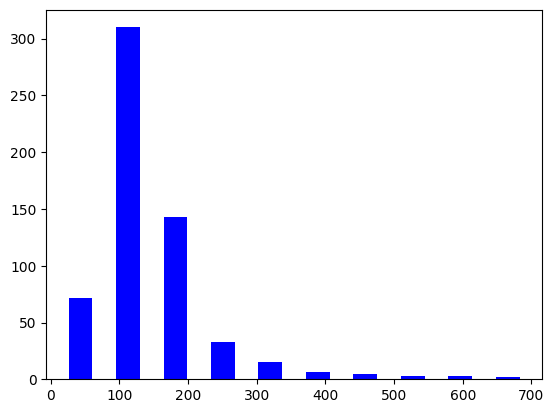

In [29]:
plt.hist(data['LoanAmount'],rwidth=0.5,color='blue')
plt.show()

In [30]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

In [31]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**b. Outlier detection**

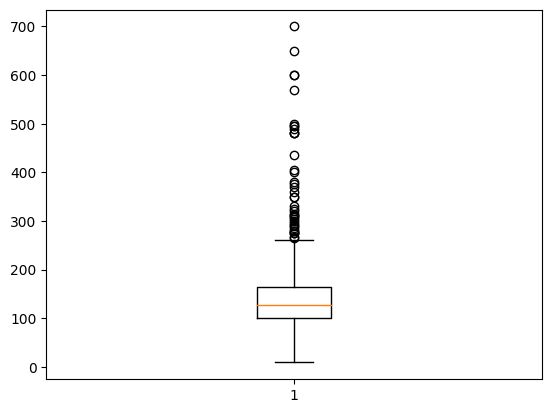

In [32]:
plt.boxplot(data['LoanAmount'])
plt.show()

In [33]:
q1 = data['LoanAmount'].quantile(0.25)
q2 = data['LoanAmount'].quantile(0.5)
q3 = data['LoanAmount'].quantile(0.75)

In [34]:
iqr = q3 -q1

In [35]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [36]:
print(up_lim,low_lim)

261.5 3.5


In [37]:
data[(data['LoanAmount']>up_lim) | (data['LoanAmount']<low_lim)].index

Int64Index([  5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171,
            177, 233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372,
            381, 391, 409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592,
            600, 604],
           dtype='int64')

In [38]:
data.drop([  5,  21,  34,  54,  65,  67,  83, 126, 130, 155, 159, 161, 171,
            233, 236, 255, 258, 260, 278, 308, 324, 325, 333, 348, 351, 369,
            381, 391, 409, 432, 484, 487, 511, 514, 525, 536, 561, 564, 568,
            572, 592, 604, 611],inplace = True)

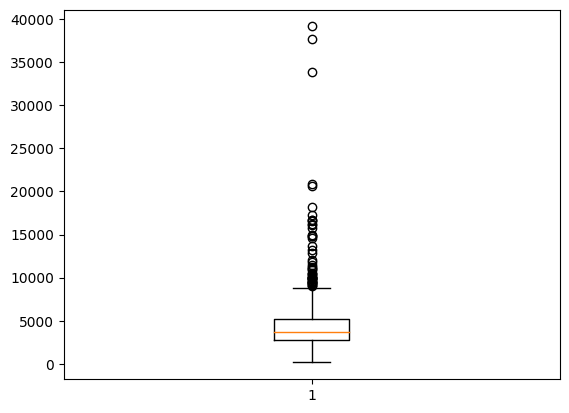

In [39]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

In [40]:
q1 = data['ApplicantIncome'].quantile(0.25)
q2 = data['ApplicantIncome'].quantile(0.5)
q3 = data['ApplicantIncome'].quantile(0.75)

In [41]:
iqr = q3 -q1

In [42]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [43]:
print(up_lim,low_lim)

8902.25 -915.75


In [44]:
data[(data['ApplicantIncome']>up_lim) | (data['ApplicantIncome']<low_lim)].index

Int64Index([  9,  25, 102, 106, 115, 119, 128, 138, 144, 146, 148, 152, 157,
            164, 183, 185, 189, 191, 199, 210, 246, 254, 271, 284, 289, 319,
            334, 350, 370, 372, 390, 424, 435, 438, 443, 467, 475, 478, 483,
            493, 506, 509, 533, 534, 557, 594, 598],
           dtype='int64')

In [45]:
data.drop([9,  25, 102, 106, 115, 119, 128, 138, 144, 146, 148, 152, 157,
            164, 183, 185, 189, 191, 199, 210, 246, 254, 271, 284, 289, 319,
            334, 350, 370, 372, 390, 424, 435, 438, 443, 467, 475, 478, 483,
            493, 506, 509, 533, 534, 557, 594, 598],inplace = True)

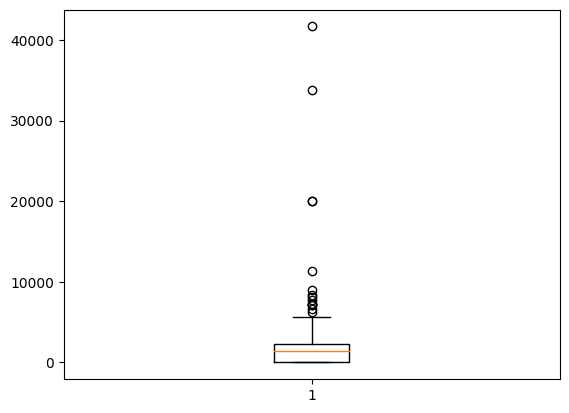

In [46]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

In [47]:
q1 = data['CoapplicantIncome'].quantile(0.25)
q2 = data['CoapplicantIncome'].quantile(0.5)
q3 = data['CoapplicantIncome'].quantile(0.75)

In [48]:
iqr = q3 -q1

In [49]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [50]:
print(up_lim,low_lim)

5832.5 -3499.5


In [51]:
data[(data['CoapplicantIncome']>up_lim) | (data['CoapplicantIncome']<low_lim)].index

Int64Index([12, 38, 122, 135, 177, 180, 253, 349, 402, 417, 444, 513, 523, 581,
            600],
           dtype='int64')

In [52]:
data.drop([12, 38, 122, 135, 177, 180, 253, 349, 402, 417, 444, 513, 523, 581,
            600],inplace = True)

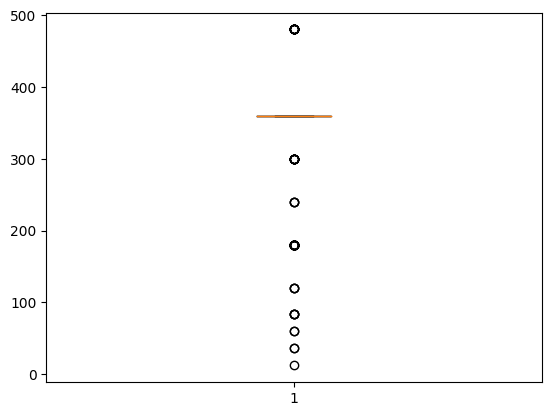

In [53]:
plt.boxplot(data['Loan_Amount_Term'])
plt.show()

In [54]:
q1 = data['Loan_Amount_Term'].quantile(0.25)
q2 = data['Loan_Amount_Term'].quantile(0.75)
iqr = q3-q1
print(iqr)

1973.0


In [55]:
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr
print(upper_limit)
print(lower_limit)

5292.5
-2599.5


In [56]:
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [57]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].apply(limit_imputer)

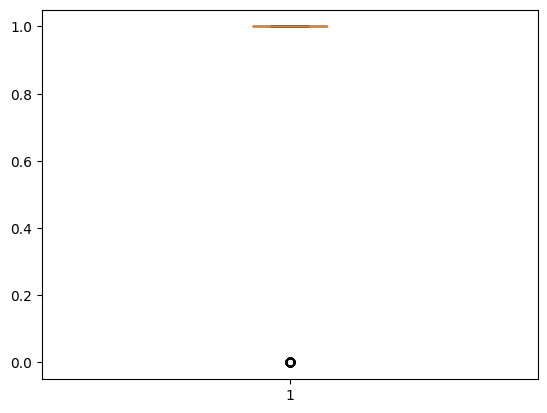

In [58]:
plt.boxplot(data['Credit_History'])
plt.show()

In [59]:
q1 = data['Credit_History'].quantile(0.25)
q2 = data['Credit_History'].quantile(0.75)
iqr = q3-q1
print(iqr)

2332.0


In [60]:
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr
print(upper_limit)
print(lower_limit)

5831.0
-3497.0


In [61]:
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [62]:
data['Credit_History'] = data['Credit_History'].apply(limit_imputer)

In [63]:
data.shape

(509, 12)

**c. Encoding**

In [64]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [65]:
dict1 = {'Male':1,'Female':2}

In [66]:
data['Gender']= data['Gender'].map(dict1)

In [67]:
data['Dependents'].unique()

array(['0', '1', '3+', '2'], dtype=object)

In [68]:
data['Dependents'] = data['Dependents'].str.strip('+')

In [69]:
data['Dependents'] = data['Dependents'].astype('int32')

In [70]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [71]:
dict1 = {'Graduate':1, 'Not Graduate':2}

In [72]:
data['Education']= data['Education'].map(dict1)

In [73]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [74]:
dict1 = {'Urban':1,'Rural':2,'Semiurban':3}

In [75]:
data['Property_Area']= data['Property_Area'].map(dict1)

In [76]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [77]:
dict1 = {'Y':1,'N':0}

In [78]:
data['Loan_Status']= data['Loan_Status'].map(dict1)

In [79]:
y=data['Loan_Status']
x= [['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]


In [80]:
x = pd.get_dummies(data)

**scaling**

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
min_max = MinMaxScaler()

In [83]:
x.columns

Index(['Gender', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Married_No', 'Married_Yes',
       'Self_Employed_No', 'Self_Employed_Yes'],
      dtype='object')

In [84]:
x.loc[:,['Gender', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'],] = min_max.fit_transform(x[['Gender', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area']])

<ipython-input-84-d07c9f56d7c1>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:,['Gender', 'Dependents', 'Education', 'ApplicantIncome',


In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state =1)

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
clf =DecisionTreeClassifier()

In [88]:
clf = clf.fit(x_train,y_train)

**3. Perform different Ensemble Learning techniques in the given dataset.**

**Ensemble methods are techniques that aim at improving the accuracy of results in models by combining multiple models instead of using a single model.**

*  The three main classes of ensemble learning methods are bagging, stacking, and boosting




**1.Boosting Method**

 Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors. In boosting, a random sample of data is selected, fitted with a model and then trained sequentially—that is, each model tries to compensate for the weaknesses of its predecessor.

In [89]:
from sklearn.ensemble import AdaBoostClassifier
ad_clf = AdaBoostClassifier(n_estimators=7)
ad_clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=7)

In [90]:
y_pred=ad_clf.predict(x_test)

In [91]:
from sklearn import metrics

In [92]:
print('Accuracy:',metrics.accuracy_score(y_pred,y_test))

Accuracy: 1.0


In [93]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [94]:
confusion_matrix(y_test,y_pred)

array([[40,  0],
       [ 0, 88]])

In [95]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [96]:
precision_score(y_test,y_pred)

1.0

In [97]:
recall_score(y_test,y_pred)

1.0

In [98]:
f1_score(y_test,y_pred)

1.0

**::::Gradient boosting is an algorithm that gradually increases its accuracy. To start the process, we need an initial guess or prediction. The initial guess is always the average of the target.**

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators = 100,max_depth = 3, random_state = 42)
gb_clf.fit(x_train,y_train)
y_pred_gb = gb_clf.predict(x_test)
print('Accuracy:',metrics.accuracy_score(y_pred,y_test))

Accuracy: 1.0


2.**Random Forest**



* Random forest is a commonly-used machine learning algorithm.it combines the output ofmultiple decision trees to reach a single result.

* it prevents overfitting and is more accurate in predictions.  



In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
clf =RandomForestClassifier(n_estimators=100)

In [102]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [103]:
y_pred=clf.predict(x_test)

In [104]:
print('Accuracy:',metrics.accuracy_score(y_pred,y_test))

Accuracy: 1.0


In [105]:
confusion_matrix(y_test,y_pred)

array([[40,  0],
       [ 0, 88]])

In [106]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [107]:
precision_score(y_test,y_pred)

1.0

In [108]:
recall_score(y_test,y_pred)

1.0

In [109]:
f1_score(y_test,y_pred)

1.0

**3.Bagging**



*  Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy dataset





In [110]:
from sklearn.ensemble import BaggingClassifier

In [111]:
tree=DecisionTreeClassifier()

In [112]:
bagging_clf = BaggingClassifier(estimator = tree, n_estimators = 100, random_state = 42)

In [113]:
bagging_clf.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [114]:
y_pred_bag= bagging_clf.predict(x_test)

In [115]:
print('Accuracy:',metrics.accuracy_score(y_pred,y_test))

Accuracy: 1.0


In [116]:
confusion_matrix(y_test,y_pred)

array([[40,  0],
       [ 0, 88]])

In [117]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [118]:
precision_score(y_test,y_pred)

1.0

In [119]:
recall_score(y_test,y_pred)

1.0

In [120]:
f1_score(y_test,y_pred)

1.0